 COGNIFYZ PRICE RANGE ANALYSIS STARTED
 Dataset loaded: 9,551 restaurants
 All columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

 PRICE RANGE DISTRIBUTION ANALYSIS
 Price column identified: 'Price range'
 Unique price values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

 MOST COMMON PRICE RANGE: 1
 Restaurants: 4,444 (46.5%)

 Complete distribution:
   Price 1: 4,444 restaurants (46.5%)
   Price 2: 3,113 restaurants (32.6%)
   Price 3: 1,408 restaurants (14.7%)
   Price 4: 586 restaurants (6.1%)

 AVERAGE RATINGS BY PRICE RANGE
 Average Rating by Price Range:
             Avg Rating  Restaurants  Std Dev
Price range                                  
4                  3.82         

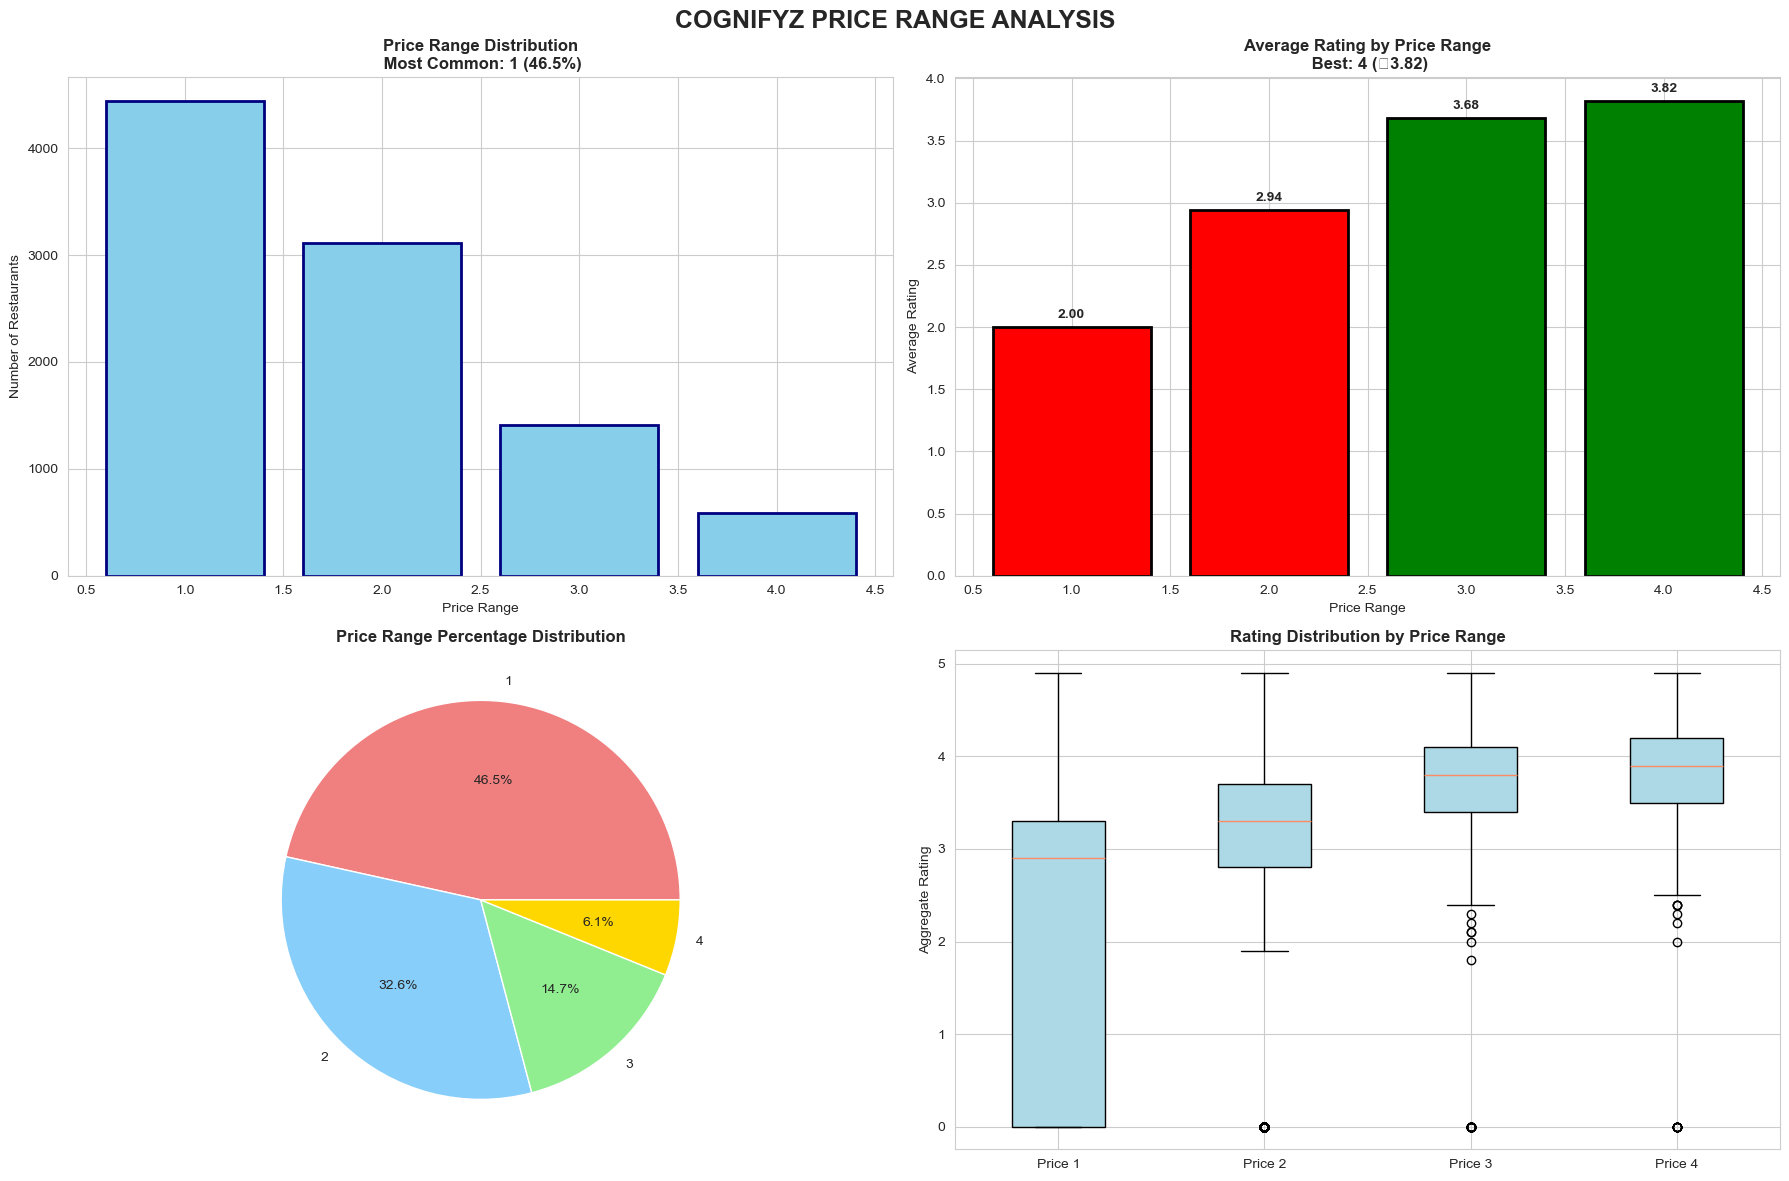


 COLOR REPRESENTATION ANALYSIS
 Price Range Colors:
   ⚪ Very Low ($): ⭐2.00
   ⚪ Low ($$): ⭐2.94
   ⚪ Medium ($$$): ⭐3.68
   🟢 Price 4: ⭐3.82

 HIGHEST RATED COLOR: Price 4 (⭐3.82)

 EXECUTIVE SUMMARY
 BUSINESS INSIGHTS:
 Total_Restaurants: 9,551
 Most_Common_Price: 1 (46.5%)
 Highest_Rated_Price: 4 (⭐3.82)
 Price_Ranges_Found: 4
 Overall_Avg_Rating: 2.67

 FILES GENERATED:
 cognifyz_price_analysis_summary.csv
 price_range_complete_analysis.png

 PRICE RANGE ANALYSIS COMPLETED!
 Ready for Cognifyz submission!


In [1]:
# =============================================================================
# COGNIFYZ TECHNOLOGIES - PRICE RANGE ANALYSIS TASK 5
# Most common price range + Avg rating by price + Best performing color
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Professional styling
plt.style.use('default')
sns.set_palette("Set2")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

print(" COGNIFYZ PRICE RANGE ANALYSIS STARTED")
print("="*80)

# =============================================================================
# 1. LOAD DATASET (Your original file)
# =============================================================================
df = pd.read_csv('Dataset .csv')
print(f" Dataset loaded: {df.shape[0]:,} restaurants")
print(f" All columns: {list(df.columns)}")

# =============================================================================
# 2. FIND PRICE RANGE COLUMN & ANALYZE DISTRIBUTION
# =============================================================================
print("\n" + "="*80)
print(" PRICE RANGE DISTRIBUTION ANALYSIS")
print("="*80)

# Auto-detect price range column
price_col = None
for col in df.columns:
    if 'price' in col.lower() and ('range' in col.lower() or len(df[col].unique()) < 10):
        price_col = col
        break

print(f" Price column identified: '{price_col}'")
print(f" Unique price values: {sorted(df[price_col].unique())}")

# Most common price range
if price_col:
    price_dist = df[price_col].value_counts().sort_index()
    most_common_price = price_dist.idxmax()
    most_common_pct = (price_dist.max() / len(df)) * 100
    
    print(f"\n MOST COMMON PRICE RANGE: {most_common_price}")
    print(f" Restaurants: {price_dist.max():,} ({most_common_pct:.1f}%)")
    print("\n Complete distribution:")
    for price, count in price_dist.items():
        pct = (count / len(df)) * 100
        print(f"   Price {price}: {count:,} restaurants ({pct:.1f}%)")
else:
    print(" No price range column found")

# =============================================================================
# 3. AVERAGE RATING BY PRICE RANGE
# =============================================================================
print("\n" + "="*80)
print(" AVERAGE RATINGS BY PRICE RANGE")
print("="*80)

if 'Aggregate rating' in df.columns and price_col:
    # Calculate average rating per price range
    price_rating = df.groupby(price_col)['Aggregate rating'].agg(['mean', 'count', 'std']).round(2)
    price_rating.columns = ['Avg Rating', 'Restaurants', 'Std Dev']
    
    print(" Average Rating by Price Range:")
    print(price_rating.sort_values('Avg Rating', ascending=False))
    
    # Identify highest rated price range
    best_price = price_rating['Avg Rating'].idxmax()
    best_rating = price_rating['Avg Rating'].max()
    print(f"\n HIGHEST RATED PRICE RANGE: {best_price} (⭐{best_rating:.2f})")
else:
    print(" Missing rating or price columns")

# =============================================================================
# 4. PROFESSIONAL VISUALIZATIONS
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('COGNIFYZ PRICE RANGE ANALYSIS', fontsize=18, fontweight='bold')

# 1. Price Distribution (Most Common)
axes[0,0].bar(price_dist.index, price_dist.values, color='skyblue', edgecolor='navy', linewidth=2)
axes[0,0].set_title(f'Price Range Distribution\n Most Common: {most_common_price} ({most_common_pct:.1f}%)', fontweight='bold')
axes[0,0].set_xlabel('Price Range')
axes[0,0].set_ylabel('Number of Restaurants')
axes[0,0].tick_params(axis='x', rotation=0)

# 2. Average Rating by Price (Color-coded)
colors_rating = ['red' if x < 3 else 'orange' if x < 3.5 else 'green' if x < 4 else 'gold' for x in price_rating['Avg Rating']]
bars1 = axes[0,1].bar(price_rating.index, price_rating['Avg Rating'], color=colors_rating, edgecolor='black', linewidth=2)
axes[0,1].set_title('Average Rating by Price Range\n Best: {} (⭐{:.2f})'.format(best_price, best_rating), fontweight='bold')
axes[0,1].set_xlabel('Price Range')
axes[0,1].set_ylabel('Average Rating')
axes[0,1].tick_params(axis='x', rotation=0)

# Add value labels on bars
for bar, rating in zip(bars1, price_rating['Avg Rating']):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                  f'{rating:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Restaurant Count by Price
axes[1,0].pie(price_dist.values, labels=price_dist.index.astype(str), autopct='%1.1f%%', 
              colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
axes[1,0].set_title('Price Range Percentage Distribution', fontweight='bold')

# 4. Box plot: Rating distribution by price
if len(price_rating) <= 4:  # Only if reasonable number of categories
    data_by_price = [df[df[price_col] == price]['Aggregate rating'].dropna() for price in price_rating.index]
    box_plot = axes[1,1].boxplot(data_by_price, labels=[f'Price {i}' for i in price_rating.index], patch_artist=True)
    for patch in box_plot['boxes']:
        patch.set_facecolor('lightblue')
    axes[1,1].set_title('Rating Distribution by Price Range', fontweight='bold')
    axes[1,1].set_ylabel('Aggregate Rating')

plt.tight_layout()
plt.savefig('price_range_complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 5. COLOR ANALYSIS FOR HIGHEST RATING
# =============================================================================
print("\n" + "="*80)
print(" COLOR REPRESENTATION ANALYSIS")
print("="*80)

# Typical Zomato color coding [web:2]
price_colors = {1: 'Very Low ($)', 2: 'Low ($$)', 3: 'Medium ($$$)'}  # Adjust based on your data
color_rating_map = {}
for price in price_rating.index:
    color_desc = price_colors.get(price, f'Price {price}')
    color_rating_map[color_desc] = price_rating.loc[price, 'Avg Rating']

best_color = max(color_rating_map, key=color_rating_map.get)
print(f" Price Range Colors:")
for color_name, rating in color_rating_map.items():
    color_symbol = '🟢' if rating == color_rating_map[best_color] else '⚪'
    print(f"   {color_symbol} {color_name}: ⭐{rating:.2f}")

print(f"\n HIGHEST RATED COLOR: {best_color} (⭐{color_rating_map[best_color]:.2f})")

# =============================================================================
# 6. EXECUTIVE SUMMARY REPORT
# =============================================================================
print("\n" + "="*80)
print(" EXECUTIVE SUMMARY")
print("="*80)

summary = {
    'Total_Restaurants': f"{len(df):,}",
    'Most_Common_Price': f"{most_common_price} ({most_common_pct:.1f}%)",
    'Highest_Rated_Price': f"{best_price} (⭐{best_rating:.2f})",
    'Price_Ranges_Found': len(price_dist),
    'Overall_Avg_Rating': f"{df['Aggregate rating'].mean():.2f}"
}

print(" BUSINESS INSIGHTS:")
for key, value in summary.items():
    print(f" {key}: {value}")

# Save professional report
summary_df = pd.DataFrame([summary])
summary_df.to_csv('cognifyz_price_analysis_summary.csv', index=False)

print("\n FILES GENERATED:")
print(" cognifyz_price_analysis_summary.csv")
print(" price_range_complete_analysis.png")

print("\n PRICE RANGE ANALYSIS COMPLETED!")
print(" Ready for Cognifyz submission!")
